In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [27]:
from scrapp_refacto import *
movies

,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée
0,Les Évadés,1994,9.3,Frank Darabont,2384498,28341469,[Drama ],142
1,Le parrain,1972,9.2,Francis Ford Coppola,1652566,134966411,"[Crime, Drama ]",175
2,The Dark Knight : Le Chevalier noir,2008,9.0,Christopher Nolan,2347962,534858444,"[Action, Crime, Drama ]",152
3,"Le parrain, 2ème partie",1974,9.0,Francis Ford Coppola,1149888,57300000,"[Crime, Drama ]",202
4,12 Hommes en colère,1957,9.0,Sidney Lumet,704057,4360000,"[Crime, Drama ]",96
...,...,...,...,...,...,...,...,...
245,Mr. Smith au sénat,1939,8.1,Frank Capra,108451,9600000,"[Comedy, Drama ]",129
246,Autant en emporte le vent,1939,8.1,"['Sam Wood ', 'George Cukor', 'Victor Flemi...",293981,198676459,"[Drama, History, Romance ]",238
247,New York - Miami,1934,8.1,Frank Capra,95754,4360000,"[Comedy, Romance ]",105
248,La passion de Jeanne d'Arc,1928,8.1,Carl Theodor Dreyer,48981,21877,"[Biography, Drama, History ]",110


In [28]:
movies.Titre = movies.Titre.astype(str).astype(str)
movies.Année = movies.Année.astype(str).astype(int)
movies.Score = movies.Score.astype(str).astype(float)
movies.Réalisateur = movies.Réalisateur.astype(str).astype(str)
movies.Votes = movies.Votes.astype(str).astype(int)
movies.Recette = movies.Recette.astype(str)
movies.Recette = movies.Recette.apply(lambda x: x.replace(",", ""))
movies.Recette = movies.Recette.astype(str).astype(int)
movies.isnull().sum(axis=0)


Titre          0
Année          0
Score          0
Réalisateur    0
Votes          0
Recette        0
Genre          0
Durée          0
dtype: int64

In [29]:
df_sort_by_recette = movies.sort_values('Recette', ascending=False)
df_sort_by_recette


,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée
56,Avengers: Endgame,2019,8.4,"['Joe Russo ', 'Anthony Russo']",865101,858373000,"[Action, Adventure, Drama ]",181
57,Avengers: Infinity War,2018,8.4,"['Joe Russo ', 'Anthony Russo']",871231,678815482,"[Action, Adventure, Sci-Fi ]",149
2,The Dark Knight : Le Chevalier noir,2008,9.0,Christopher Nolan,2347962,534858444,"[Action, Crime, Drama ]",152
60,The Dark Knight Rises,2012,8.4,Christopher Nolan,1540637,448139099,"[Action, Adventure ]",164
41,The Lion King,1994,8.5,"['Rob Minkoff ', 'Roger Allers']",958633,422783777,"[Animation, Adventure, Drama ]",88
...,...,...,...,...,...,...,...,...
98,Requiem pour un massacre - Va et regarde,1985,8.3,Elem Klimov,62166,0,"[Drama, Thriller, War ]",142
173,Silent Voice,2016,8.1,Naoko Yamada,53141,0,"[Animation, Drama, Family ]",130
85,Mon père et mon fils,2005,8.3,Çagan Irmak,80653,0,"[Drama, Family ]",112
84,The Father,2020,8.3,Florian Zeller,49184,0,[Drama ],97


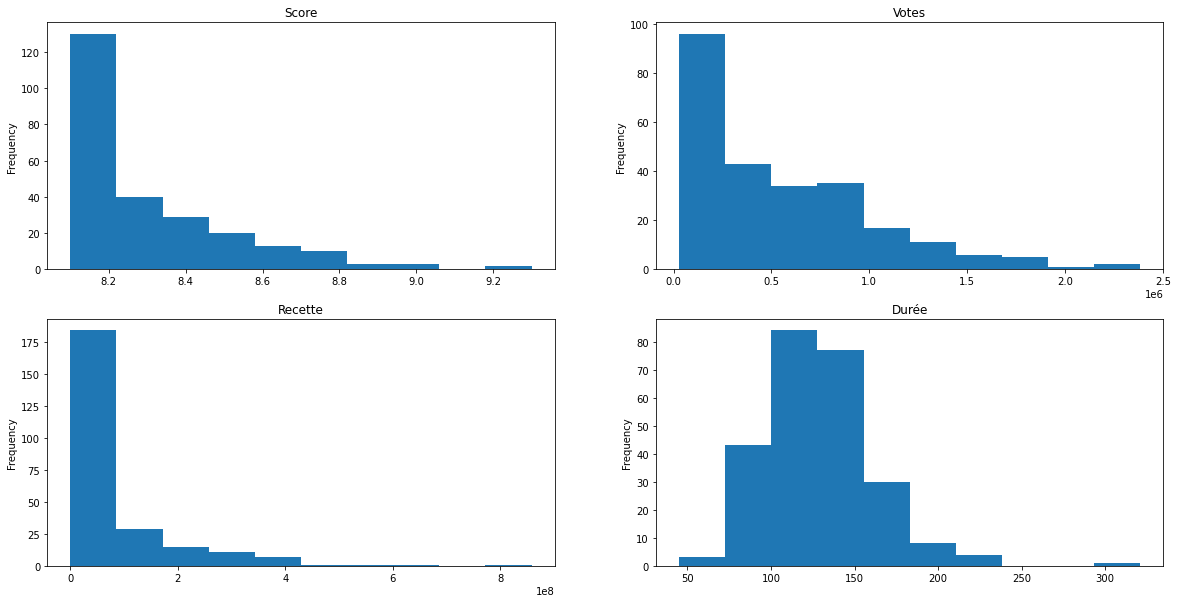

In [45]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

movies['Score'].plot(kind='hist', bins=10, ax=ax[0,0], title='Score')
movies['Votes'].plot(kind='hist', bins=10, ax=ax[0,1], title='Votes')
movies['Recette'].plot(kind='hist', bins=10, ax=ax[1,0], title='Recette')
movies['Durée'].plot(kind='hist', bins=10, ax=ax[1,1], title='Durée');

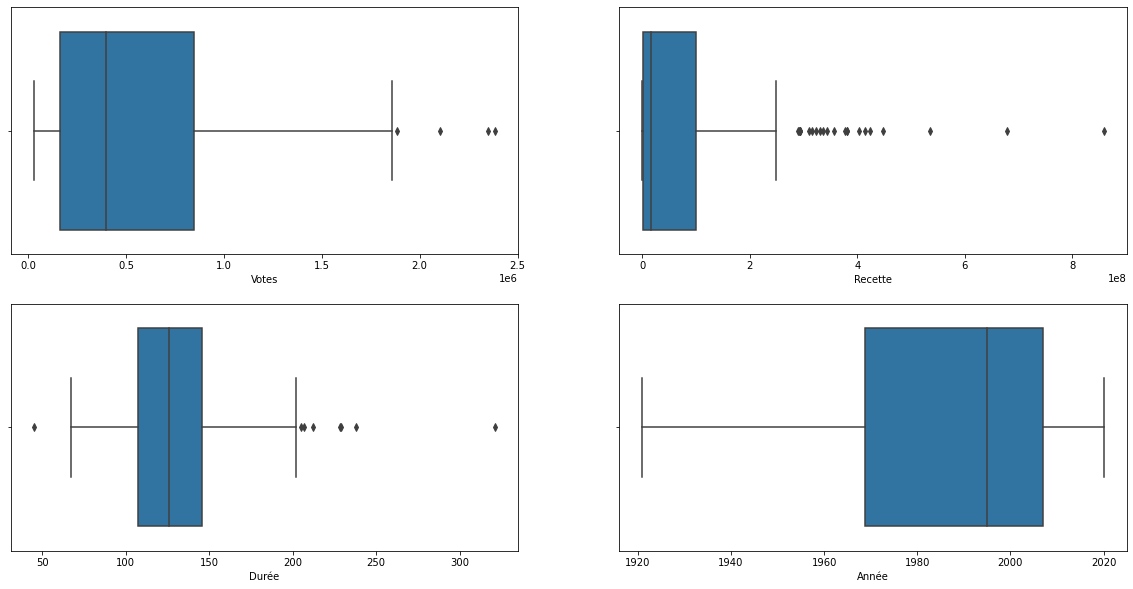

In [43]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

sns.boxplot(x=movies['Votes'], ax=ax[0,0])
sns.boxplot(x=movies['Recette'], ax=ax[0,1])
sns.boxplot(x=movies['Durée'], ax=ax[1,0])
sns.boxplot(x=movies['Année'], ax=ax[1,1]);

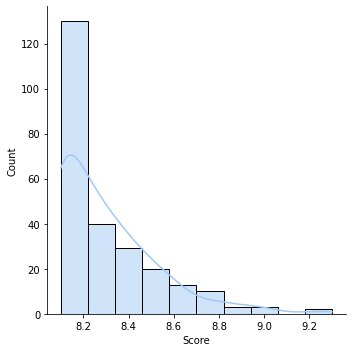

In [32]:
sns.displot(movies['Score'], color='b', bins=10, kde=True);

/home/juliecharrier/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juliecharrier/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juliecharrier/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

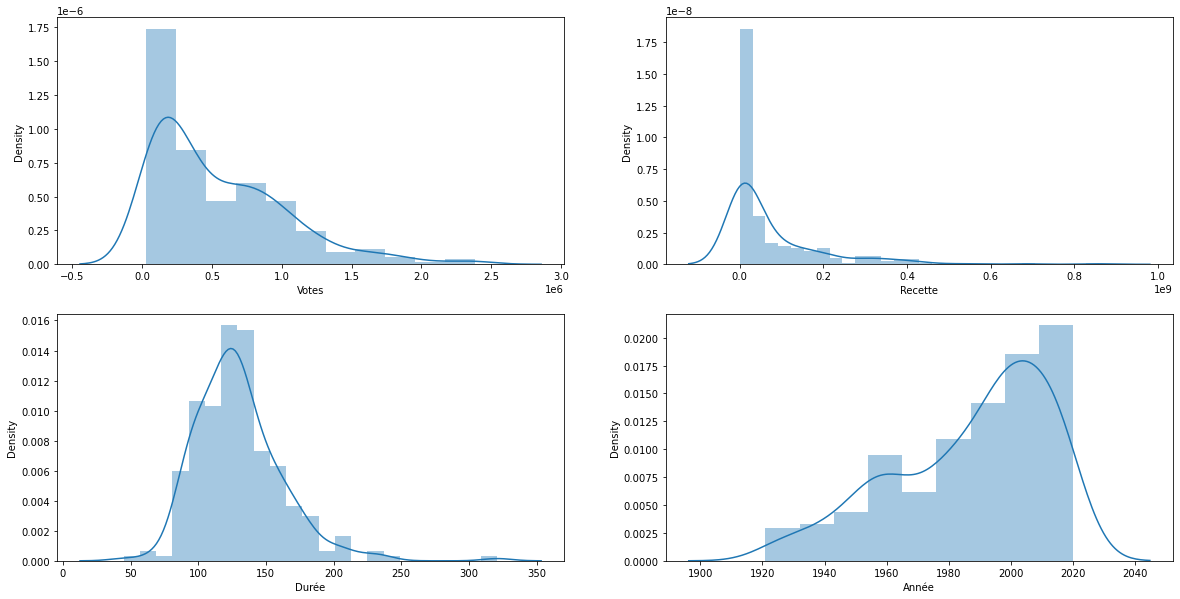

In [38]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

sns.distplot(movies['Votes'], ax=ax[0,0])
sns.distplot(movies['Recette'], ax=ax[0,1])
sns.distplot(movies['Durée'], ax=ax[1,0])
sns.distplot(movies['Année'], ax=ax[1,1]);

In [46]:
movies.describe()

,Année,Score,Votes,Recette,Durée
count,250.000000,250.000000,2.500000e+02,2.500000e+02,250.000000
mean,1987.292000,8.301200,5.481919e+05,7.504796e+07,129.632000
std,24.824499,0.222343,4.750147e+05,1.225948e+08,32.476135
min,1921.000000,8.100000,2.803800e+04,0.000000e+00,45.000000
25%,1968.750000,8.100000,1.608608e+05,1.051812e+06,107.250000
50%,1995.000000,8.200000,3.984845e+05,1.635978e+07,126.000000
75%,2007.000000,8.400000,8.464938e+05,1.004006e+08,145.750000
max,2020.000000,9.300000,2.384498e+06,8.583730e+08,321.000000


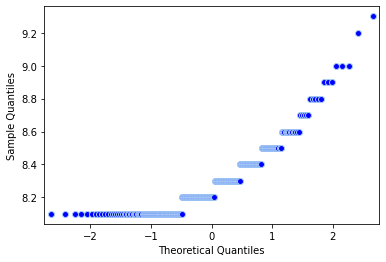

In [47]:
import statsmodels.api as sm

sm.qqplot(movies['Score'])
plt.show()

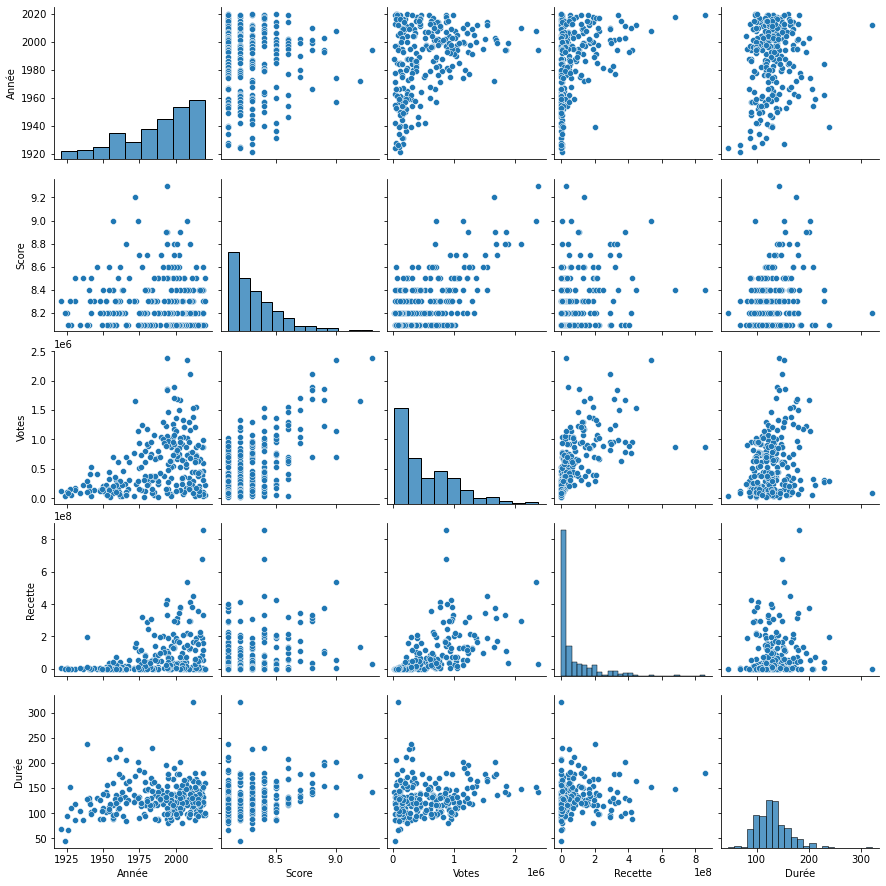

In [50]:
sns.pairplot(movies)